In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
df = pd.read_csv("/kaggle/input/understanding_cloud_organization/train.csv")
df.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


In [3]:
df[['Image_Name', 'Label']] = df['Image_Label'].str.split("_", expand=True)
df.drop(['Image_Label'], axis = 1, inplace = True)

In [4]:
df.head()

,EncodedPixels,Image_Name,Label
0,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
2,NaN,0011165.jpg,Gravel
3,NaN,0011165.jpg,Sugar
4,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish


In [5]:
df.isnull().sum()

EncodedPixels    10348
Image_Name           0
Label                0
dtype: int64

In [6]:
df.dropna(inplace = True)
df.head()

,EncodedPixels,Image_Name,Label
0,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
4,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish
5,1339279 519 1340679 519 1342079 519 1343479 51...,002be4f.jpg,Flower
7,67495 350 68895 350 70295 350 71695 350 73095 ...,002be4f.jpg,Sugar


In [7]:
df['Image_Name'].nunique()

5546

In [8]:
pivoted_df = df.pivot(index='Image_Name', columns='Label', values='EncodedPixels').reset_index()
pivoted_df.head()

Label,Image_Name,Fish,Flower,Gravel,Sugar
0,0011165.jpg,264918 937 266318 937 267718 937 269118 937 27...,1355565 1002 1356965 1002 1358365 1002 1359765...,NaN,NaN
1,002be4f.jpg,233813 878 235213 878 236613 878 238010 881 23...,1339279 519 1340679 519 1342079 519 1343479 51...,NaN,67495 350 68895 350 70295 350 71695 350 73095 ...
2,0031ae9.jpg,3510 690 4910 690 6310 690 7710 690 9110 690 1...,2047 703 3447 703 4847 703 6247 703 7647 703 9...,NaN,658170 388 659570 388 660970 388 662370 388 66...
3,0035239.jpg,NaN,100812 462 102212 462 103612 462 105012 462 10...,65400 380 66800 380 68200 380 69600 380 71000 ...,NaN
4,003994e.jpg,2367966 18 2367985 2 2367993 8 2368002 62 2369...,NaN,353317 416 354717 416 356117 416 357517 416 35...,28011 489 29411 489 30811 489 32211 489 33611 ...


In [9]:
pivoted_df.shape

(5546, 5)

In [10]:
pivoted_df.to_csv("data.csv", index = False)

In [27]:
def decode_rle(mask_rle,shape = (1400, 2100)):
    """decoding mask string"""
    s = mask_rle.split()
    
    starts , lengths = [np.asarray(x, dtype = int) for x in (s[0::2],s[1::2])]
    starts -= 1
    ends = starts + lengths
    tmp_img = np.zeros(shape[0]*shape[1], dtype = np.uint8)
    for lo, hi in zip(starts, ends):
        tmp_img[lo:hi] = 1
        
    return tmp_img.reshape(shape, order ="F")

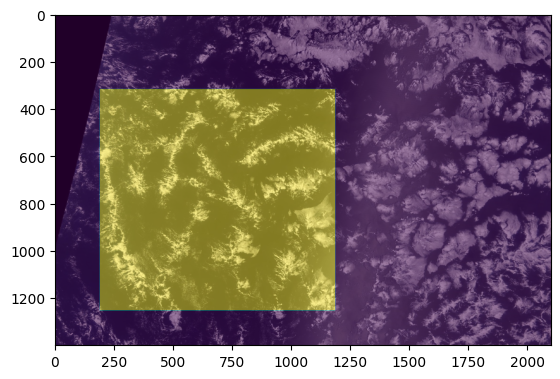

In [29]:
path = "/kaggle/input/understanding_cloud_organization/train_images"

for row in df.index[:5]:
    name = df['Image_Name'][row]
    img = cv2.cvtColor(cv2.imread(f"{path}/{name}"), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    mask_rle = df['EncodedPixels'][row]
    mask = decode_rle(mask_rle)
    plt.imshow(mask, alpha = 0.5)
    break

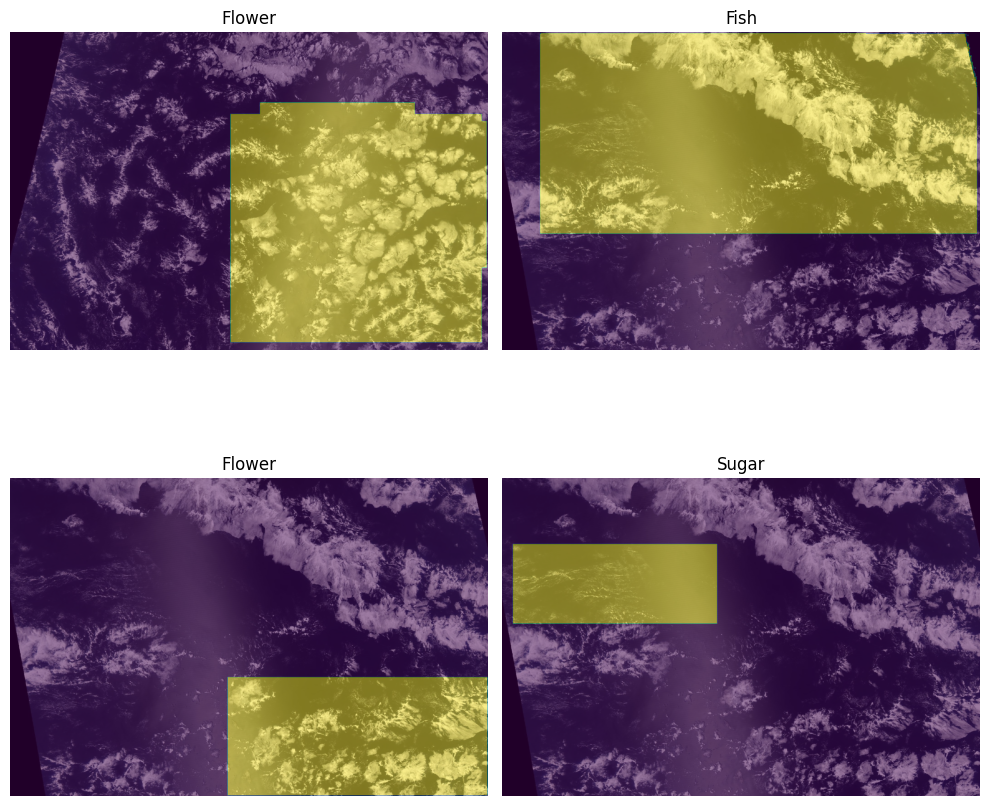

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid of subplots
for i, row in enumerate(df.index[1:5], 0):  # Start from index 1 to include row 2, end at index 5 (exclusive)
    name = df['Image_Name'][row]
    img = cv2.cvtColor(cv2.imread(f"{path}/{name}"), cv2.COLOR_BGR2RGB)
    
    # Determine subplot location based on index
    subplot_row = i // 2  # Calculate row index for subplot
    subplot_col = i % 2   # Calculate column index for subplot
    
    # Display image in the current subplot
    axes[subplot_row, subplot_col].imshow(img)
    axes[subplot_row, subplot_col].set_title(f'{df["Label"][row]}')  # Set subplot title
    
    # Overlay mask on the image
    mask_rle = df['EncodedPixels'][row]
    mask = decode_rle(mask_rle)
    axes[subplot_row, subplot_col].imshow(mask, alpha=0.5)
    
    # Set axis labels and remove ticks
    axes[subplot_row, subplot_col].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()